## Notebook for running examples of GeoGuessrAI

#### The next few cells is for importing required libraries, defining functions for labels in plots, and loading data

In [1]:
# Importing packages
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import resnet18
from torchvision.models import resnet34

# Import ImageDataset
from dataloader import ImageDataset
import matplotlib.pyplot as plt
import heatmap

data = ImageDataset()

In [2]:
mapping = {
    0: 'de',#'Germany',
    1: 'dk',#'Denmark',
    2: 'ee',#'Estonia',
    3: 'es',#'Spain',
    4: 'fr',#'France',
    5: 'gb',#'United Kingdom',
    6: 'gr',#'Greece',
    7: 'it',#'Italy',
    8: 'no',#'Norway',
    9: 'pl',#'Poland',
    10: 'ro',#'Romania',
    11: 'se',#'Sweden',
    12: 'ua',#'Ukraine',
}
def mapfunc(L):
    return [mapping[l].upper() for l in L]

In [3]:
# Create loader
testloader = torch.utils.data.DataLoader(
    data,
    batch_size=1,
    shuffle=True
)

#### Now we define the ResNet as done before training. We then load the optimal weights from the training, which are located in the folder "models".

In [4]:
num_countries = 13
num_epochs = 1
lr = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_fn = nn.CrossEntropyLoss()
model_name = 'model'
batch_size = 2
weight_decay = 0
lr = 0.001
model_type = 34
num_epochs = 100
model = resnet34()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_fn = nn.CrossEntropyLoss()
model.fc = nn.Linear(512, 13)
# Load state dict but to device
model.load_state_dict(torch.load('model/best_params.pt', map_location=device
))
model = model.to(device)
iterloader = iter(testloader)



#### We now take the next random image from the set, and run it through the model. We then plot the image, and the predicted location.

In [5]:
img, label, img_path = next(iterloader)
img = img.to(device)
img = img.float()
pred = model(img)
props = torch.softmax(pred, dim=1).cpu().detach()
pred = torch.argmax(props, dim=1)

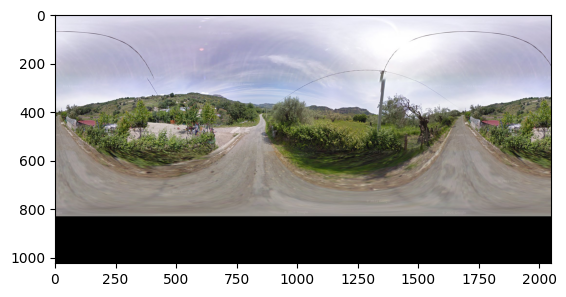

In [6]:
from PIL import Image
img = Image.open(img_path[0])
plt.imshow(img)
plt.show()

In [7]:
heatmap.heatmap(props[0], int(label[0]))
print(f"Prediction: {mapping[int(pred[0])].upper()}")
print(f"Ground truth: {mapping[int(label[0])].upper()}")
str = ", ".join(mapfunc(np.argsort(props[0].numpy())[::-1][0:3]))
print(f"Top 3: {str}")

Prediction: GR
Ground truth: IT
Top 3: GR, ES, IT
